<a href="https://colab.research.google.com/github/labibaa/Forecasting-Inflation/blob/main/GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datasetf_1 - cpi_month.csv to datasetf_1 - cpi_month.csv


In [ ]:
data = pd.read_csv('datasetf_1 - cpi_month.csv')

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [ ]:
data.set_index('Date', inplace=True)
inflation = data['Inflation']

In [ ]:
dataset = data['Inflation'].values.reshape(-1, 1)


In [ ]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

In [ ]:
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

In [ ]:
window_size = 10


In [ ]:
X, y = create_dataset(dataset, window_size)


In [ ]:
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(X_train, y_train, epochs=250, batch_size=128, verbose=1)


Epoch 1/250
1/1 [==============================] - 4s 4s/step - loss: 0.0489
Epoch 2/250
1/1 [==============================] - 0s 28ms/step - loss: 0.0448
Epoch 3/250
1/1 [==============================] - 0s 23ms/step - loss: 0.0409
Epoch 4/250
1/1 [==============================] - 0s 24ms/step - loss: 0.0373
Epoch 5/250
1/1 [==============================] - 0s 22ms/step - loss: 0.0339
Epoch 6/250
1/1 [==============================] - 0s 25ms/step - loss: 0.0308
Epoch 7/250
1/1 [==============================] - 0s 25ms/step - loss: 0.0278
Epoch 8/250
1/1 [==============================] - 0s 36ms/step - loss: 0.0251
Epoch 9/250
1/1 [==============================] - 0s 24ms/step - loss: 0.0226
Epoch 10/250
1/1 [==============================] - 0s 24ms/step - loss: 0.0203
Epoch 11/250
1/1 [==============================] - 0s 26ms/step - loss: 0.0182
Epoch 12/250
1/1 [==============================] - 0s 45ms/step - loss: 0.0163
Epoch 13/250
1/1 [==============================] -

In [ ]:
predictions = model.predict(X_test)


1/1 [==============================] - 1s 714ms/step


In [ ]:
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
def calculate_mape(y_test, predictions):
    return np.mean(np.abs((y_test - predictions) / y_test)) * 100

mape = calculate_mape(y_test, predictions)

rmse = mean_squared_error(y_test, predictions, squared=False)

mae = mean_absolute_error(y_test, predictions)

print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Percentage Error (MAPE):', mape)


Mean Absolute Error (MAE): 0.4964360427856444
Root Mean Squared Error (RMSE): 0.7563857775029289
Mean Absolute Percentage Error (MAPE): 6.801156313620433


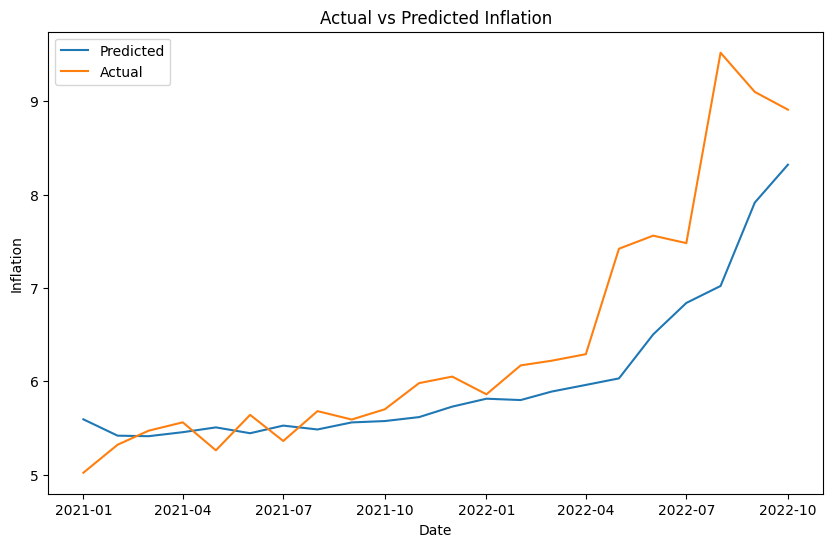

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size + window_size:], predictions, label='Predicted')
plt.plot(data.index[train_size + window_size:], data['Inflation'].values[train_size + window_size:], label='Actual')
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.title('Actual vs Predicted Inflation')
plt.legend()
plt.show()

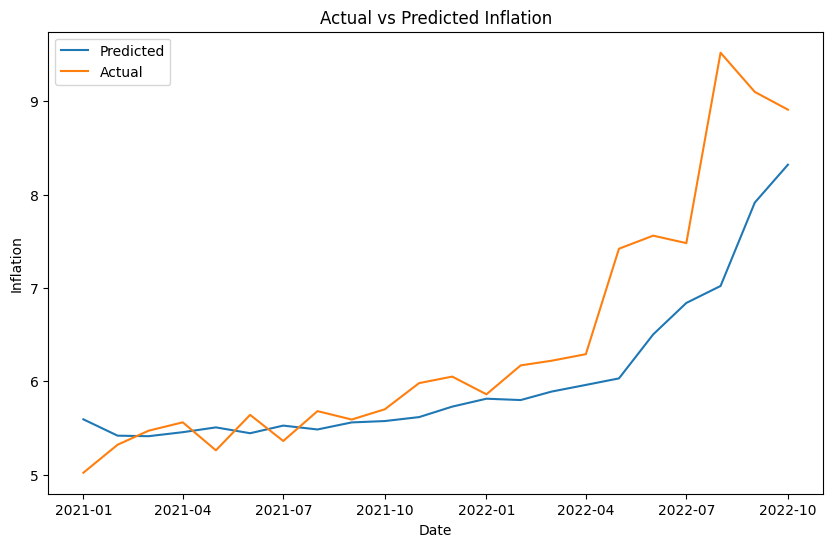

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size + window_size:], predictions, label='Predicted')
plt.plot(data.index[train_size + window_size:], data['Inflation'].values[train_size + window_size:], label='Actual')
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.title('Actual vs Predicted Inflation')
plt.legend()
plt.show()

In [ ]:
forecasted_data = pd.DataFrame({
    'Date': data.index[train_size + window_size:],
    'Actual Inflation': data['Inflation'].values[train_size + window_size:],
    'Predicted Inflation': predictions.flatten()
})

In [ ]:
forecasted_data

,Date,Actual Inflation,Predicted Inflation
0,2021-01-01,5.02,5.591934
1,2021-02-01,5.32,5.416923
2,2021-03-01,5.47,5.411332
3,2021-04-01,5.56,5.454223
4,2021-05-01,5.26,5.505697
5,2021-06-01,5.64,5.443125
6,2021-07-01,5.36,5.524927
7,2021-08-01,5.68,5.483442
8,2021-09-01,5.59,5.559012
9,2021-10-01,5.70,5.573637


In [ ]:
forecasted_data.to_csv('forecasted_inflation.csv', index=False)

In [ ]:
from google.colab import files
forecasted_data.to_csv('forecasted_data.csv', encoding = 'utf-8-sig')
files.download('forecasted_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>